In [1]:
import loans
import search
# import graphviz
import pandas

In [2]:
#q1
bank = loans.Bank("First Home Bank")
avgInterest=0
count=0
for i in bank:
    if i.interest_rate != -1:
        count+=1
        avgInterest+=i.interest_rate

avgInterest=avgInterest/count
avgInterest

2.962962962962963

In [3]:
#q2
count=0
avgApplicant=0
for i in bank:
    count+=1
    avgApplicant+=len(i.applicants)
avgApplicant=avgApplicant/count
avgApplicant


1.5777777777777777

In [4]:
#q3
ageDict={}
for i in bank:
    for app in i.applicants:
        if app.age not in ageDict:
            ageDict[app.age]=0
        for a in ageDict:
            if app.age==a:
                ageDict[a] += 1
ageDict

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [5]:
#q4
loanTree=search.BST()
for i in bank:
    loanTree.add(i.interest_rate, i)

len(loanTree[-1])



18

In [6]:
#q5
def height(node):
    if node == None:
        return 0
    return max(height(node.left), height(node.right)) + 1
height(loanTree.root)


9

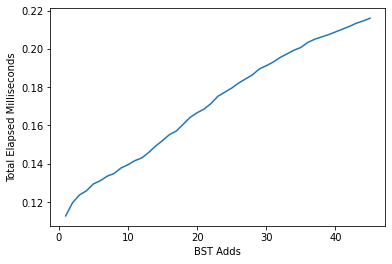

In [7]:
#q6
import time
import matplotlib.pyplot as plt

bank2 = loans.Bank("University of Wisconsin Credit Union")
nodes = []
sec = []
tree = search.BST()
counts=0
t0 = time.time()
for i in bank:
    counts+=1
    nodes.append(counts)
    tree.add(str(i.interest_rate), i)
    t1 = time.time()
    sec.append((t1 - t0) * 1000)

plt.plot(nodes, sec)
plt.xlabel('BST Adds')
plt.ylabel('Total Elapsed Milliseconds')
plt.show()

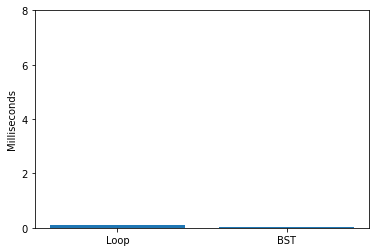

In [8]:
#q7
import numpy as np

length = 0
t0 = time.time()
for i in bank:
    if i.interest_rate == -1:
        length += 1
t1 = time.time()
loop = (t1 - t0) * 1000

t0 = time.time()
tree["-1"]
t1 = time.time()
bst = (t1 - t0) * 1000

plt.bar(np.array(["Loop", "BST"]), np.array([loop, bst]))
plt.ylabel('Milliseconds')
y = np.arange(0, 10, 2)
plt.yticks(y)
plt.show()

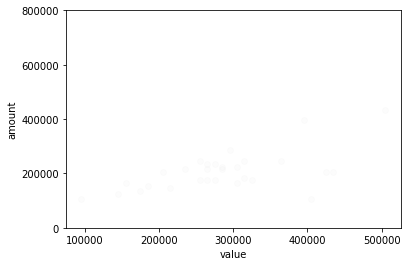

In [9]:
#q8
value = []
amount = []
for i in bank:
    if i.property_value> 0 and i.property_value < 1000000:
        value.append(i.property_value)
        amount.append(i.loan_amount)
        
plt.scatter(value, amount, alpha = 0.01, color = "black")
y = np.arange(0, 1000000, 200000)
plt.yticks(y)
plt.xlabel('value')
plt.ylabel('amount')
plt.show()

In [ ]:
#q9
race = {}
race["2+"] = 0
race["unknown"] = 0
for i in bank:
    for j in i.applicants:
        if len(j.race) == 0:
            race["unknown"] += 1
        elif len(j.race) >= 2:
            race["2+"] += 1
        else:
            for n in j.race:
                if n in race.keys():
                    race[n] += 1
                else:
                    race[n] = 1

plt.bar(list(race.keys()), list(race.values()))
plt.xticks(rotation = 90)
plt.xlabel('Race')
plt.ylabel('Number of Applicants')
plt.show()

In [ ]:
#q10
def total(root):
    if root == None:
        return 0
    return 1 + total(root.right) + total(root.left) 
total(tree.root)